# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from sklearn.impute import SimpleImputer

/var/folders/wg/hrk6rd4s2mv7ztvpxryxn48c0000gn/T/ipykernel_5174/4181064569.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

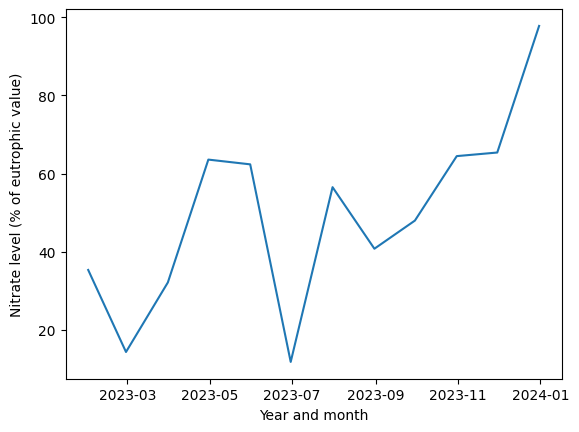

In [2]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')

ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/var/folders/wg/hrk6rd4s2mv7ztvpxryxn48c0000gn/T/ipykernel_5174/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

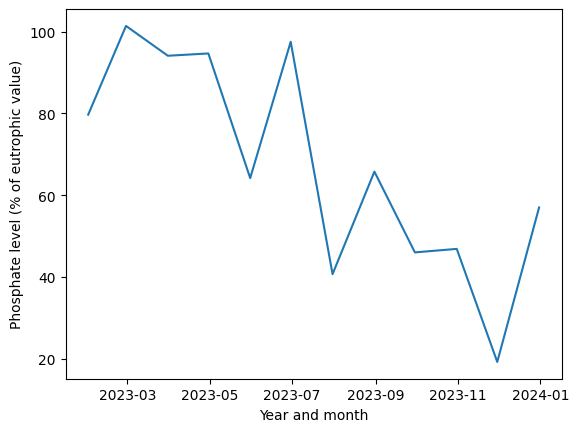

In [3]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

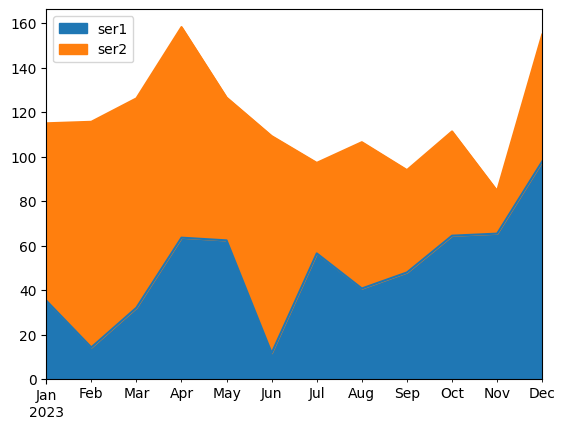

In [4]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.


#### **Import**

**The Injury Record Datasets**

These datasets were taken from the **NFL First and Future** project. The aim of the dataset was to investigate the role that different surfaces had on Injury prevalence. 

In [5]:
PlayerTrackData = pd.read_csv("/Users/leemcfarling/Documents/BU Grad School/Semester Two /AI for Leaders/NFL_Stats/SurfaceAnalytics/PlayerTrackData.csv")
InjuryRecord = pd.read_csv("/Users/leemcfarling/Documents/BU Grad School/Semester Two /AI for Leaders/NFL_Stats/SurfaceAnalytics/InjuryRecord.csv")
PlayList = pd.read_csv("/Users/leemcfarling/Documents/BU Grad School/Semester Two /AI for Leaders/NFL_Stats/SurfaceAnalytics/PlayList.csv")

In [6]:
PlayList

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,1,QB,QB
1,26624,26624-1,26624-1-2,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,2,QB,QB
2,26624,26624-1,26624-1-3,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,3,QB,QB
3,26624,26624-1,26624-1-4,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,4,QB,QB
4,26624,26624-1,26624-1-5,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,5,QB,QB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267000,47888,47888-13,47888-13-51,Cornerback,99,13,Outdoor,Synthetic,33,Sunny and cold,Pass,51,DB,DB
267001,47888,47888-13,47888-13-52,Cornerback,99,13,Outdoor,Synthetic,33,Sunny and cold,Pass,52,DB,DB
267002,47888,47888-13,47888-13-53,Cornerback,99,13,Outdoor,Synthetic,33,Sunny and cold,Pass,53,DB,DB
267003,47888,47888-13,47888-13-54,Cornerback,99,13,Outdoor,Synthetic,33,Sunny and cold,Pass,54,DB,DB


**We're going to have to do some major data cleaning in order to make this usable for any type of further analysis so I'll dedicate the next bit to that. Questions that were originally in this part have been moved lower.**

First, let's start with the InjuryRecord dataFrame. Right now, there are four columns tracking injurise (it's been one-hot encoded). This might be good for a model, but it's not very helpful for EDA. Let's condense it into one column. 

In [7]:
InjuryRecord['InjuryLength'] = InjuryRecord[['DM_M1', 'DM_M7', 'DM_M28', 'DM_M42']].sum(axis=1)
injury_mapping = {1: "1+", 2: "7+", 3: "28+", 4: "42+"}
InjuryRecord['InjuryLength'] = InjuryRecord['InjuryLength'].map(injury_mapping).astype(str)
InjuryRecord

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,InjuryLength
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1,42+
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0,7+
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1,42+
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0,1+
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1,42+
...,...,...,...,...,...,...,...,...,...,...
100,44423,44423-13,NaN,Knee,Synthetic,1,0,0,0,1+
101,31933,31933-20,NaN,Knee,Synthetic,1,0,0,0,1+
102,47285,47285-4,NaN,Knee,Natural,1,1,0,0,7+
103,37068,37068-19,NaN,Knee,Natural,1,1,0,0,7+


Next, there are a bunch of useful metrics being tracked in the PlayerTrackData DataFrame, but they're names are not very intuitive. Let's rename them from their current values ( dir, s, dis, to direction, speed, distance etc.)

In [8]:
PlayerTrackData1 = PlayerTrackData.loc[PlayerTrackData.groupby('PlayKey')['time'].idxmax()]
PlayerTrackData1 = PlayerTrackData1.rename(columns={'dir': 'direction', 's': 'speed', 'dis': 'distance'})

Next, the StadiumType field is not standardized very well (as evidenced below). To fix this, I'll condense the myriad of different choises down to three. 

In [9]:
PlayList['StadiumType'].unique()

array(['Outdoor', 'Indoors', 'Oudoor', 'Outdoors', 'Open', 'Closed Dome',
       'Domed, closed', nan, 'Dome', 'Indoor', 'Domed',
       'Retr. Roof-Closed', 'Outdoor Retr Roof-Open', 'Retractable Roof',
       'Ourdoor', 'Indoor, Roof Closed', 'Retr. Roof - Closed', 'Bowl',
       'Outddors', 'Retr. Roof-Open', 'Dome, closed', 'Indoor, Open Roof',
       'Domed, Open', 'Domed, open', 'Heinz Field', 'Cloudy',
       'Retr. Roof - Open', 'Retr. Roof Closed', 'Outdor', 'Outside'],
      dtype=object)

In [10]:
stadium_mapping = {
    "Outdoor": "Outdoors",
    "Oudoor": "Outdoors",
    "Outdoors": "Outdoors",
    "Open": "Outdoors",
    "Outdoor Retr Roof": "Outdoors",
    "Oudoor": "Outdoors",
    "Outddors": "Outdoors",
    "Retr. Roof-Open": "Outdoors",
    "Retr. Roof - Open": "Outdoors",
    "Outdor": "Outdoors",
    "Outside": "Outdoors",
    "Heinz Field": "Outdoors",
    "Cloudy": "Outdoors",
    "Outdoor Retr Roof-Open" : "Outdoors", 
    "Ourdoor" : "Outdoors",
    "Indoor, Open Roof" : "Outdoors",

    "Indoors": "Indoors",
    "Closed Dome": "Indoors",
    "Domed": "Indoors",
    "closed": "Indoors",
    "Dome": "Indoors",
    "Indoor": "Indoors",
    "Retr. Roof-Closed": "Indoors",
    "Retr. Roof - Closed": "Indoors",
    "Retractable Roof": "Indoors",
    "Domed, Open": "Indoors",
    "Domed, open": "Indoors",
    "Roof Closed": "Indoors",
    "Dome, closed": "Indoors",
    "Domed, closed" : "Indoors",
    "Indoor, Roof Closed": "Indoors", 
    "Retr. Roof Closed": "Indoors",

    "nan": "Unknown",
    "Bowl": "Unknown"
}

PlayList['StadiumType'] = PlayList['StadiumType'].replace(stadium_mapping)
PlayList['StadiumType'] = PlayList['StadiumType'].replace(stadium_mapping).fillna("Unknown")

print(PlayList['StadiumType'].unique())

['Outdoors' 'Indoors' 'Unknown']


Now it's the same thing for Weather. Let's condense these as much as possible as well. 


In [11]:
PlayList['Weather'].unique()

array(['Clear and warm', 'Mostly Cloudy', 'Sunny', 'Clear', 'Cloudy',
       'Cloudy, fog started developing in 2nd quarter', 'Rain',
       'Partly Cloudy', 'Mostly cloudy', 'Cloudy and cold',
       'Cloudy and Cool', 'Rain Chance 40%', 'Controlled Climate',
       'Sunny and warm', 'Partly cloudy', 'Clear and Cool',
       'Clear and cold', 'Sunny and cold', 'Indoor', nan, 'Partly Sunny',
       'N/A (Indoors)', 'Mostly Sunny', 'Indoors', 'Clear Skies',
       'Partly sunny', 'Showers', 'N/A Indoor', 'Sunny and clear', 'Snow',
       'Scattered Showers', 'Party Cloudy', 'Clear skies',
       'Rain likely, temps in low 40s.', 'Hazy', 'Partly Clouidy',
       'Sunny Skies', 'Overcast', 'Cloudy, 50% change of rain', 'Fair',
       'Light Rain', 'Partly clear', 'Mostly Coudy', '10% Chance of Rain',
       'Cloudy, chance of rain', 'Heat Index 95',
       'Sunny, highs to upper 80s', 'Sun & clouds',
       'Heavy lake effect snow', 'Mostly sunny', 'Cloudy, Rain',
       'Sunny, Windy', '

In [12]:
weather_mapping = {
    # Sunny
    "Clear and warm": "Sunny",
    "Sunny": "Sunny",
    "Clear": "Sunny",
    "Clear Skies": "Sunny",
    "Clear and Cool": "Sunny",
    "Clear and Sunny": "Sunny",
    "Clear and cold": "Sunny",
    "Fair": "Sunny",
    "Sunny and cold": "Sunny",
    "Mostly Sunny": "Sunny",
    "Clear skies": "Sunny",
    "Sunny Skies": "Sunny",
    "Sunny and warm": "Sunny",
    "Sunny and clear": "Sunny",
    "Sunny, Windy": "Sunny",
    "Sunny, highs to upper 80s": "Sunny", 
    "Clear and sunny": "Sunny",

    # Partly Cloudy
    "Partly cloudy": "Partly Cloudy",
    "Mostly Sunny Skies": "Partly Cloudy",
    "Mostly sunny": "Partly Cloudy",
    "Partly Sunny": "Partly Cloudy",
    "Partly sunny": "Partly Cloudy",
    "Party Cloudy": "Partly Cloudy",
    "Partly Cloudy": "Partly Cloudy",
    "Partly clear": "Partly Cloudy",
    "Sun & clouds": "Partly Cloudy",
    "Clear to Partly Cloudy": "Partly Cloudy",
    "Partly Clouidy" : "Partly Cloudy",

    # Cloudy
    "Cloudy": "Cloudy",
    "Cloudy and cold": "Cloudy",
    "Mostly Cloudy": "Cloudy",
    "Cloudy and Cool": "Cloudy",
    "Mostly Coudy": "Cloudy",
    "cloudy": "Cloudy",
    "Coudy": "Cloudy",
    "Mostly cloudy": "Cloudy",
    "Overcast": "Cloudy",
    "Cloudy, chance of rain" : "Cloudy" ,   

    # Rain
    "Scattered Showers" : "Rain",
    "Rainy": "Rain",
    "Rain": "Rain",
    "Rain Chance 40%": "Rain",
    "Showers": "Rain",
    "30% Chance of Rain": "Rain",
    "Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.": "Rain",
    "Light Rain": "Rain",
    "chance of rain": "Rain",
    "Rain shower": "Rain",
    "Rain likely": "Rain",
    "Rain likely, temps in low 40s." : "Rain",
    "Cloudy, 50% change of rain" : "Rain",
    "Cloudy, Rain": "Rain",
    "50% change of rain": "Rain",
    "10% Chance of Rain": "Rain",
    "Cloudy with periods of rain": "Rain",

    # Snow
    "Snow": "Snow",
    "Heavy lake effect snow": "Snow",
    "light snow accumulating 1-3": "Snow",
    "Cloudy, light snow accumulating 1-3": "Snow", 
    'Cloudy, light snow accumulating 1-3"': "Snow",

    # Fog
    "Cloudy, fog started developing in 2nd quarter": "Fog",
    "Hazy": "Fog",
    

    # Unknown
    "nan": "Unknown",
    "temps in low 40s.": "Unknown",
    "Heat Index 95": "Unknown",
    "highs to upper 80s": "Unknown",
    "Cold": "Unknown",

    # N/A Indoors
    "N/A (Indoors)": "N/A (Indoors)",
    "Controlled Climate": "N/A (Indoors)",
    "N/A Indoor": "N/A (Indoors)",
    "Indoor": "N/A (Indoors)",
    "Indoors": "N/A (Indoors)"
}

PlayList['Weather'] = PlayList['Weather'].replace(weather_mapping).fillna("Unknown")
print(PlayList['Weather'].unique())

['Sunny' 'Cloudy' 'Fog' 'Rain' 'Partly Cloudy' 'N/A (Indoors)' 'Unknown'
 'Snow']


In [13]:
PlayList['PlayType'].unique()

array(['Pass', 'Rush', '0', nan, 'Kickoff', 'Kickoff Not Returned',
       'Field Goal', 'Punt', 'Punt Not Returned', 'Punt Returned',
       'Kickoff Returned', 'Extra Point'], dtype=object)

In [14]:
PlayTypeMapping = {
    "0" : "Unknown",
    "nan" : "Unknown",

    # Kickoff
    "Kickoff Not Returned" : "Kickoff",
    "Kickoff Returned" : "Kickoff",

    # Punt
    "Punt Not Returned" : "Punt",
    "Punt Returned": "Punt",
}
PlayList['PlayType'] = PlayList['PlayType'].replace(PlayTypeMapping).fillna("Unknown")
PlayList['PlayType'].unique()

array(['Pass', 'Rush', 'Unknown', 'Kickoff', 'Field Goal', 'Punt',
       'Extra Point'], dtype=object)

In [15]:
PositionGroupMapping = {
    "QB" : "QuarterBack",
    "Missing Data" : "Unknown",
    "WR" : "WideReciever",
    "LB" : "LineBacker",
    "RB" : "RunningBack",
    "DL" : "DefensiveLine",
    "TE" : "TightEnd",
    "DB" : "DefensiveBack",
    "OL" : "OffensiveLine",
    "SPEC" : "SpecialTeams"
}



PlayList['PositionGroup'] = PlayList['PositionGroup'].replace(PositionGroupMapping)
PlayList['PositionGroup'].unique()



array(['QuarterBack', 'Unknown', 'WideReciever', 'LineBacker',
       'RunningBack', 'DefensiveLine', 'TightEnd', 'DefensiveBack',
       'OffensiveLine', 'SpecialTeams'], dtype=object)

And we uncovered some temps that were set to -999 degrees. Let's replace those with the median Temperature Value instead. 

In [16]:
PlayList[['Temperature']].median()

PlayList_Temp_Map = {
    -999 : 61.0
}

PlayList['Temperature'] = PlayList['Temperature'].replace(PlayList_Temp_Map)
PlayList.query("Temperature < -100")

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup


In [17]:
Merged_Injury = InjuryRecord[['PlayKey', 'BodyPart', 'Surface', 'InjuryLength', ]].merge(
    PlayList[['PlayKey', 'PlayerDay', 'PlayerGame', 'StadiumType', 'FieldType', 'Temperature', 'Weather', 'PlayType', 'PlayerGamePlay', 'Position', 'PositionGroup']], 
    how='inner', 
    on=['PlayKey']).merge(PlayerTrackData1[['PlayKey', 'x', 'y', 'direction', 'speed', 'distance', 'time']], how='inner', on='PlayKey')

Merged_Injury

,PlayKey,BodyPart,Surface,InjuryLength,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup,x,y,direction,speed,distance,time
0,39873-4-32,Knee,Synthetic,42+,29,4,Indoors,Synthetic,84,Cloudy,Punt,32,OLB,LineBacker,92.52,41.20,183.97,1.09,0.11,44.1
1,46074-7-26,Knee,Natural,7+,50,7,Outdoors,Natural,76,Partly Cloudy,Punt,26,OLB,LineBacker,95.29,28.91,70.80,1.15,0.10,22.2
2,36557-1-70,Ankle,Synthetic,42+,1,1,Outdoors,Synthetic,63,Sunny,Pass,70,SS,DefensiveBack,73.97,10.93,38.16,0.27,0.03,15.9
3,46646-3-30,Ankle,Natural,1+,15,3,Outdoors,Natural,80,Cloudy,Punt,30,LB,LineBacker,70.95,23.79,11.18,0.17,0.03,24.9
4,43532-5-69,Ankle,Synthetic,42+,32,5,Indoors,Synthetic,89,Partly Cloudy,Kickoff,69,WR,WideReciever,74.73,47.42,144.15,0.05,0.09,34.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,42418-19-15,Ankle,Synthetic,1+,442,19,Indoors,Synthetic,57,Cloudy,Rush,15,C,OffensiveLine,54.31,18.60,301.85,0.21,0.01,32.0
73,46394-18-3,Knee,Synthetic,7+,393,18,Outdoors,Synthetic,45,Cloudy,Kickoff,3,TE,TightEnd,34.06,35.00,170.42,4.37,0.44,36.5
74,45187-9-4,Ankle,Natural,1+,327,9,Outdoors,Natural,81,Cloudy,Rush,4,WR,WideReciever,23.35,26.26,42.85,4.19,0.41,31.6
75,42448-14-3,Knee,Synthetic,28+,379,14,Indoors,Synthetic,78,Partly Cloudy,Pass,3,WR,WideReciever,61.80,-8.12,97.18,0.50,0.04,18.4


In [18]:
Merged_Injury_Occ = Merged_Injury.query("~InjuryLength.isna()").index
Merged_Injury['Inj_Occured'] = np.where(Merged_Injury.index.isin(Merged_Injury_Occ), 1, 0)
Merged_Injury

,PlayKey,BodyPart,Surface,InjuryLength,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,...,PlayerGamePlay,Position,PositionGroup,x,y,direction,speed,distance,time,Inj_Occured
0,39873-4-32,Knee,Synthetic,42+,29,4,Indoors,Synthetic,84,Cloudy,...,32,OLB,LineBacker,92.52,41.20,183.97,1.09,0.11,44.1,1
1,46074-7-26,Knee,Natural,7+,50,7,Outdoors,Natural,76,Partly Cloudy,...,26,OLB,LineBacker,95.29,28.91,70.80,1.15,0.10,22.2,1
2,36557-1-70,Ankle,Synthetic,42+,1,1,Outdoors,Synthetic,63,Sunny,...,70,SS,DefensiveBack,73.97,10.93,38.16,0.27,0.03,15.9,1
3,46646-3-30,Ankle,Natural,1+,15,3,Outdoors,Natural,80,Cloudy,...,30,LB,LineBacker,70.95,23.79,11.18,0.17,0.03,24.9,1
4,43532-5-69,Ankle,Synthetic,42+,32,5,Indoors,Synthetic,89,Partly Cloudy,...,69,WR,WideReciever,74.73,47.42,144.15,0.05,0.09,34.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,42418-19-15,Ankle,Synthetic,1+,442,19,Indoors,Synthetic,57,Cloudy,...,15,C,OffensiveLine,54.31,18.60,301.85,0.21,0.01,32.0,1
73,46394-18-3,Knee,Synthetic,7+,393,18,Outdoors,Synthetic,45,Cloudy,...,3,TE,TightEnd,34.06,35.00,170.42,4.37,0.44,36.5,1
74,45187-9-4,Ankle,Natural,1+,327,9,Outdoors,Natural,81,Cloudy,...,4,WR,WideReciever,23.35,26.26,42.85,4.19,0.41,31.6,1
75,42448-14-3,Knee,Synthetic,28+,379,14,Indoors,Synthetic,78,Partly Cloudy,...,3,WR,WideReciever,61.80,-8.12,97.18,0.50,0.04,18.4,1


Here I want to do two things: 
- Merge the three tables to get a list of all 267,000 plays that occured
- Make a new column to track all of the plays in which injuries occured


In [19]:
All_Plays = InjuryRecord[['PlayKey', 'BodyPart', 'Surface', 'InjuryLength']].merge(
    PlayList[['PlayKey', 'PlayerKey', 'PlayerDay', 'PlayerGame', 'StadiumType', 'FieldType', 'Temperature', 'Weather', 'PlayType', 'PlayerGamePlay', 'Position', 'PositionGroup']], 
    how='right', 
    on=['PlayKey']).merge(PlayerTrackData1[['PlayKey', 'x', 'y', 'direction', 'speed', 'distance', 'time']], how='left', on='PlayKey')

# Now create a column for each play that had an Injury. 
PlaysWithInjuries = All_Plays.query("~InjuryLength.isna()").index
All_Plays['Inj_Occured'] = np.where(All_Plays.index.isin(PlaysWithInjuries), 1, 0)

In [20]:
All_Plays_check = All_Plays.query("Inj_Occured == 1")
Players_That_got_Injured = All_Plays_check['PlayerKey']

Filtered_Inj_Players = All_Plays[All_Plays['PlayerKey'].isin(Players_That_got_Injured)]
Filtered_Inj_Players


,PlayKey,BodyPart,Surface,InjuryLength,PlayerKey,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,...,PlayerGamePlay,Position,PositionGroup,x,y,direction,speed,distance,time,Inj_Occured
7162,31070-1-1,NaN,NaN,NaN,31070,1,1,Outdoors,Natural,67,...,1,RB,RunningBack,69.11,40.96,5.85,3.12,0.31,29.5,0
7163,31070-1-2,NaN,NaN,NaN,31070,1,1,Outdoors,Natural,67,...,2,RB,RunningBack,36.44,53.17,92.91,3.27,0.32,60.6,0
7164,31070-1-3,NaN,NaN,NaN,31070,1,1,Outdoors,Natural,67,...,3,RB,RunningBack,66.66,53.81,17.43,0.67,0.07,42.0,0
7165,31070-1-4,NaN,NaN,NaN,31070,1,1,Outdoors,Natural,67,...,4,RB,RunningBack,61.47,30.36,300.30,0.25,0.03,53.2,0
7166,31070-1-5,NaN,NaN,NaN,31070,1,1,Outdoors,Natural,67,...,5,RB,RunningBack,54.53,46.22,9.95,3.36,0.35,33.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266373,47813-11-61,NaN,NaN,NaN,47813,113,11,Indoors,Synthetic,46,...,61,CB,DefensiveBack,62.04,2.38,12.82,1.66,0.17,26.1,0
266374,47813-11-62,NaN,NaN,NaN,47813,113,11,Indoors,Synthetic,46,...,62,CB,DefensiveBack,74.99,18.69,339.95,1.20,0.12,28.6,0
266375,47813-11-63,NaN,NaN,NaN,47813,113,11,Indoors,Synthetic,46,...,63,CB,DefensiveBack,82.84,35.28,196.51,1.19,0.12,31.2,0
266376,47813-11-64,NaN,NaN,NaN,47813,113,11,Indoors,Synthetic,46,...,64,CB,DefensiveBack,86.89,24.77,51.92,0.55,0.06,27.9,0


In [21]:
Filtered_Inj_Players_Numeric = Filtered_Inj_Players.select_dtypes(include=['number'])


In [22]:
chi_square_test(Filtered_Inj_Players)

NameError: name 'chi_square_test' is not defined

____

## **Big Data Bowl Cleaning**

In [ ]:
games = pd.read_csv("/Users/leemcfarling/Documents/BU Grad School/Semester Two /AI for Leaders/NFL_Stats/BigDataBowl/games.csv")
pffScoutingData = pd.read_csv("/Users/leemcfarling/Documents/BU Grad School/Semester Two /AI for Leaders/NFL_Stats/BigDataBowl/pffScoutingData.csv")
players = pd.read_csv("/Users/leemcfarling/Documents/BU Grad School/Semester Two /AI for Leaders/NFL_Stats/BigDataBowl/players.csv")
plays = pd.read_csv("/Users/leemcfarling/Documents/BU Grad School/Semester Two /AI for Leaders/NFL_Stats/BigDataBowl/plays.csv")
week1 = pd.read_csv("/Users/leemcfarling/Documents/BU Grad School/Semester Two /AI for Leaders/NFL_Stats/BigDataBowl/week1.csv")

In [ ]:
games

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL
1,2021091200,2021,1,09/12/2021,13:00:00,ATL,PHI
2,2021091201,2021,1,09/12/2021,13:00:00,BUF,PIT
3,2021091202,2021,1,09/12/2021,13:00:00,CAR,NYJ
4,2021091203,2021,1,09/12/2021,13:00:00,CIN,MIN
...,...,...,...,...,...,...,...
117,2021103109,2021,8,10/31/2021,16:05:00,SEA,JAX
118,2021103110,2021,8,10/31/2021,16:25:00,DEN,WAS
119,2021103111,2021,8,10/31/2021,16:25:00,NO,TB
120,2021103112,2021,8,10/31/2021,20:20:00,MIN,DAL


In [ ]:
plays

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType
0,2021090900,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,DAL,TB,33,...,NaN,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man
1,2021090900,137,(13:18) (Shotgun) D.Prescott pass deep left to...,1,1,10,DAL,TB,DAL,2,...,NaN,108.0,EMPTY,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 4 LB, 3 DB",TRADITIONAL,0,Cover-3,Zone
2,2021090900,187,(12:23) (Shotgun) D.Prescott pass short middle...,1,2,6,DAL,TB,DAL,34,...,NaN,76.0,SHOTGUN,"0 RB, 2 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0,Cover-3,Zone
3,2021090900,282,(9:56) D.Prescott pass incomplete deep left to...,1,1,10,DAL,TB,TB,39,...,NaN,49.0,SINGLEBACK,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,1,Cover-3,Zone
4,2021090900,349,(9:46) (Shotgun) D.Prescott pass incomplete sh...,1,3,15,DAL,TB,TB,44,...,NaN,54.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"3 DL, 4 LB, 4 DB",TRADITIONAL,0,Cover-3,Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8552,2021110100,4310,(1:56) (Shotgun) P.Mahomes sacked at NYG 16 fo...,4,3,8,KC,NYG,NYG,8,...,NaN,18.0,SHOTGUN,"1 RB, 1 TE, 3 WR",4.0,"1 DL, 3 LB, 7 DB",SCRAMBLE,0,Bracket,Other
8553,2021110100,4363,(1:07) (Shotgun) D.Jones pass short right to E...,4,1,10,NYG,KC,NYG,25,...,NaN,35.0,SHOTGUN,"1 RB, 1 TE, 3 WR",5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE,0,Cover-2,Zone
8554,2021110100,4392,"(1:01) (No Huddle, Shotgun) D.Jones sacked at ...",4,2,7,NYG,KC,NYG,28,...,NaN,38.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 1 LB, 6 DB",TRADITIONAL,0,Cover-2,Zone
8555,2021110100,4411,"(:39) (No Huddle, Shotgun) D.Jones pass incomp...",4,3,15,NYG,KC,NYG,20,...,NaN,30.0,SHOTGUN,"1 RB, 1 TE, 3 WR",5.0,"4 DL, 1 LB, 6 DB",TRADITIONAL,0,Cover-2,Zone


In [ ]:
injury_plays = plays[plays['playDescription'].str.contains("injur")] # This is to catch 'Injured' and 'Injury' 

In [ ]:
pffScoutingData[pffScoutingData['pff_sackAllowed'] > 0]

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
3585,2021091200,4112,53497,Pass Block,LG,NaN,NaN,NaN,0.0,0.0,0.0,1.0,43378.0,PP,0.0
3669,2021091200,4298,52486,Pass Block,C,NaN,NaN,NaN,0.0,0.0,0.0,1.0,43405.0,PP,0.0
3717,2021091200,4346,53497,Pass Block,LG,NaN,NaN,NaN,0.0,0.0,0.0,1.0,43378.0,PP,0.0
4025,2021091201,691,53557,Pass Block,LT,NaN,NaN,NaN,0.0,0.0,0.0,1.0,37841.0,PP,0.0
5407,2021091201,4103,47821,Pass Block,RG,NaN,NaN,NaN,0.0,0.0,0.0,1.0,44886.0,SW,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185655,2021103112,2270,53452,Pass Block,LT,NaN,NaN,NaN,0.0,0.0,0.0,1.0,44892.0,PT,0.0
185681,2021103112,2374,36785,Pass Block,LT,NaN,NaN,NaN,0.0,0.0,0.0,1.0,35539.0,PP,0.0
186135,2021103112,3325,47911,Pass Block,HB-L,NaN,NaN,NaN,0.0,0.0,0.0,1.0,45004.0,PU,1.0
188198,2021110100,4392,46103,Pass Block,RG,NaN,NaN,NaN,0.0,0.0,0.0,1.0,43326.0,PP,0.0


In [ ]:
week1

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
0,2021090900,97,25511.0,1,2021-09-10T00:26:31.100,12.0,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,NaN
1,2021090900,97,25511.0,2,2021-09-10T00:26:31.200,12.0,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,NaN
2,2021090900,97,25511.0,3,2021-09-10T00:26:31.300,12.0,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55,NaN
3,2021090900,97,25511.0,4,2021-09-10T00:26:31.400,12.0,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85,NaN
4,2021090900,97,25511.0,5,2021-09-10T00:26:31.500,12.0,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118117,2021091300,4845,NaN,30,2021-09-14T03:54:20.600,NaN,football,left,52.78,25.23,3.58,1.95,0.37,NaN,NaN,pass_forward
1118118,2021091300,4845,NaN,31,2021-09-14T03:54:20.700,NaN,football,left,50.31,26.46,17.16,0.25,2.77,NaN,NaN,NaN
1118119,2021091300,4845,NaN,32,2021-09-14T03:54:20.800,NaN,football,left,48.66,26.99,17.10,1.05,1.73,NaN,NaN,NaN
1118120,2021091300,4845,NaN,33,2021-09-14T03:54:20.900,NaN,football,left,47.04,27.53,16.98,1.67,1.71,NaN,NaN,NaN


___

# **Homework 6**

### Here are some types of analysis you can do:

1. Find correlations between pairs of variables.

2. Draw scatterplots, especially when the correlation is large.

3. Draw pairplots.

4. Draw line graphs and/or area graphs when there is date or time data together with numerical data.

___

## 1. Find Correlations Between Pairs of Variables.

So this is going to be super tough to correlate because most of the variables in the dataset are categorical. 

In [ ]:
All_Plays_Numeric = All_Plays.select_dtypes(include=['number'])


NameError: name 'All_Plays' is not defined

In [ ]:
Merged_Injury_Numeric = All_Plays.select_dtypes(include=['number'])
Merged_Injury_Numeric.corr()

NameError: name 'All_Plays' is not defined

And as a heatmap: 

In [ ]:
Merged_Injury_Numeric

NameError: name 'Merged_Injury_Numeric' is not defined

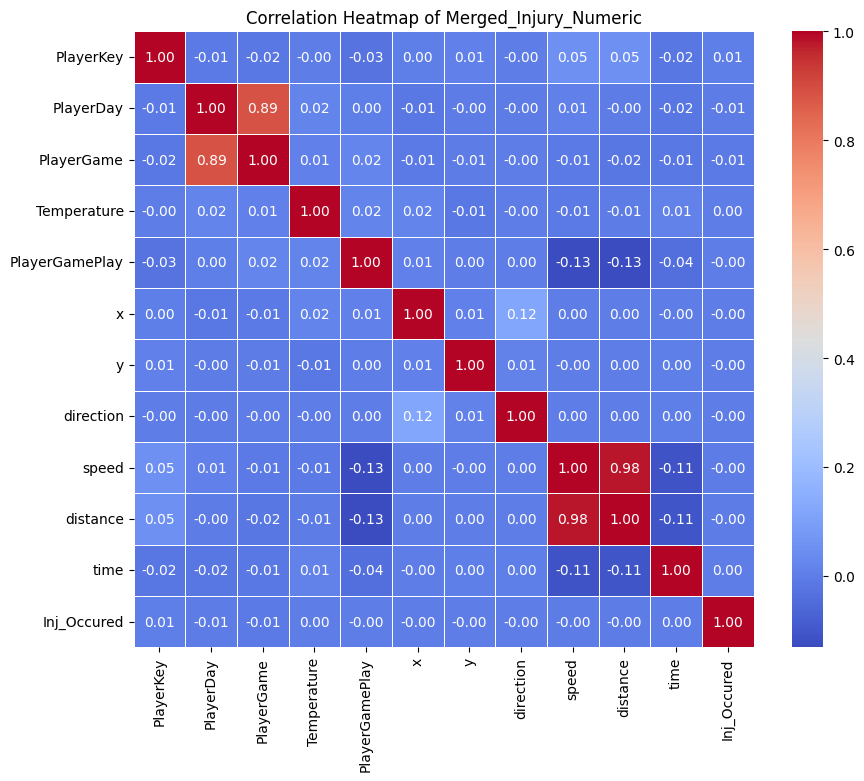

In [ ]:
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(Merged_Injury_Numeric.corr(), 
            annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap of Merged_Injury_Numeric")
plt.show()

This makes sense. No numeric columns are really correlated with the Inj_Occured column. And the only columns that are correlated *with each other* are PlayerGame and PlayerDay (this makes sense because they both track the amount of time a player has been on the field that season.)

Now, let's turn our correlation analysis over to the Categorical Data.

In [ ]:
categorical_cols = All_Plays.select_dtypes(include=['object', 'category']).columns 
All_Plays[categorical_cols]

,PlayKey,BodyPart,Surface,InjuryLength,StadiumType,FieldType,Weather,PlayType,Position,PositionGroup
0,26624-1-1,NaN,NaN,NaN,Outdoors,Synthetic,Sunny,Pass,QB,QuarterBack
1,26624-1-2,NaN,NaN,NaN,Outdoors,Synthetic,Sunny,Pass,QB,QuarterBack
2,26624-1-3,NaN,NaN,NaN,Outdoors,Synthetic,Sunny,Rush,QB,QuarterBack
3,26624-1-4,NaN,NaN,NaN,Outdoors,Synthetic,Sunny,Rush,QB,QuarterBack
4,26624-1-5,NaN,NaN,NaN,Outdoors,Synthetic,Sunny,Pass,QB,QuarterBack
...,...,...,...,...,...,...,...,...,...,...
267001,47888-13-51,NaN,NaN,NaN,Outdoors,Synthetic,Sunny,Pass,DB,DefensiveBack
267002,47888-13-52,NaN,NaN,NaN,Outdoors,Synthetic,Sunny,Pass,DB,DefensiveBack
267003,47888-13-53,NaN,NaN,NaN,Outdoors,Synthetic,Sunny,Pass,DB,DefensiveBack
267004,47888-13-54,NaN,NaN,NaN,Outdoors,Synthetic,Sunny,Pass,DB,DefensiveBack


Because the .corr() method function only works for Numeric Variables, I asked ChatGPT to give me other ways of testing correlaton, specifically for categorical data. 

For the Categorical Variables, let's look up the likelihood that the particular column and the target variable (Injury Occurance) is due to chance. In this case, the lower the better and we are specifically looking for things under 5 %. 


Citation -- Conversation with ChatGPT:
-  https://chatgpt.com/share/67c1d8c7-98fc-800f-bfd8-b55d4730491a

In [ ]:

def chi_square_test(df, target='Inj_Occured'):
    y = df[target]  # Boolean column
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns  # Select categorical columns

    results = {}
    for col in categorical_cols:
        table = pd.crosstab(df[col], y)  # Create contingency table
        chi2, p, dof, expected = stats.chi2_contingency(table)  # Perform Chi-Square test
        results[col] = p * 100 # Store p-value * 100 for readability

    return results  


p_values = chi_square_test(All_Plays)
for col, p in p_values.items():
    print(f"Likelihood that Correlation is due to chance (Chi-Square p-value) -- {col}: {p:.2f}%")


Likelihood that Correlation is due to chance (Chi-Square p-value) -- PlayKey: 49.85%
Likelihood that Correlation is due to chance (Chi-Square p-value) -- BodyPart: 100.00%
Likelihood that Correlation is due to chance (Chi-Square p-value) -- Surface: 100.00%
Likelihood that Correlation is due to chance (Chi-Square p-value) -- InjuryLength: 100.00%
Likelihood that Correlation is due to chance (Chi-Square p-value) -- StadiumType: 65.64%
Likelihood that Correlation is due to chance (Chi-Square p-value) -- FieldType: 4.28%
Likelihood that Correlation is due to chance (Chi-Square p-value) -- Weather: 15.91%
Likelihood that Correlation is due to chance (Chi-Square p-value) -- PlayType: 0.00%
Likelihood that Correlation is due to chance (Chi-Square p-value) -- Position: 45.94%
Likelihood that Correlation is due to chance (Chi-Square p-value) -- PositionGroup: 18.00%


Interesting -- so it looks like:
- FieldType and PlayType are both likely correlated with Injury Prevalence, < 5%
- There is a smaller chance that Weather and Position group also play a role. ~ 15 %
- There is around a 50/50 chance that StadiumType and Position Play a Role (Not pulling Position into this as well as that's already been handled by PositionGroup.)

And according to the analysis: 
- There is 100% chance that BodyPart, Surface, and InjuryLength correlations are due to chance. 


Now, while this is a good start, it does not tell us anything about the *strength* of the correlation. We will need Cramer's V for that. 

**Cramér's V -- Again with help from ChatGPT**
- https://chatgpt.com/share/67c1d8c7-98fc-800f-bfd8-b55d4730491a

In [ ]:
def cramers_v_test(df, target='Inj_Occured', threshold=25):
    """
    Computes Cramér's V for each categorical column against a boolean target.

    Args:
        df (pd.DataFrame): The dataframe containing categorical features.
        target (str): The boolean column to test against.
        threshold (int): Maximum unique values a column can have before being skipped.

    Returns:
        dict: Cramér’s V values for each categorical feature.
    """
    y = df[target]  # Boolean column
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns  # Select categorical columns

    results = {}
    for col in categorical_cols:
        if df[col].nunique() > threshold:
            print(f"Skipping {col}: Too many unique values ({df[col].nunique()})")
            continue  # Skip high-cardinality columns

        table = pd.crosstab(df[col], y)  # Create contingency table
        chi2, _, _, _ = stats.chi2_contingency(table)  # Compute Chi-Square
        n = table.sum().sum()  # Total observations
        r, k = table.shape  # Rows and columns in contingency table

        # Prevent division by zero
        denominator = min(r - 1, k - 1)
        if denominator == 0:
            cramers_v = 0
        else:
            cramers_v = np.sqrt((chi2 / n) / denominator)

        results[col] = cramers_v  # Store Cramér's V value

    return results  # Returns a dictionary with Cramér’s V values for each categorical column

# Run the test
v_values = cramers_v_test(All_Plays)

# Display results
for col, v in v_values.items():
    print(f"Cramér's V correlation with {col}: {v:.2f}")


Skipping PlayKey: Too many unique values (267005)
Cramér's V correlation with BodyPart: 0.00
Cramér's V correlation with Surface: 0.00
Cramér's V correlation with InjuryLength: 0.00
Cramér's V correlation with StadiumType: 0.00
Cramér's V correlation with FieldType: 0.00
Cramér's V correlation with Weather: 0.01
Cramér's V correlation with PlayType: 0.01
Cramér's V correlation with Position: 0.01
Cramér's V correlation with PositionGroup: 0.01


In [ ]:
from sklearn.feature_selection import mutual_info_classif

X_categorical = All_Plays[categorical_cols].apply(lambda x: x.astype("category").cat.codes)  # Encode categoricals
mi_scores = mutual_info_classif(X_categorical, All_Plays['Inj_Occured'], discrete_features=True)

for col, score in zip(categorical_cols, mi_scores):
    print(f"Mutual Information Score for {col}: {score:.4f}")

Mutual Information Score for PlayKey: 0.0026
Mutual Information Score for BodyPart: 0.0026
Mutual Information Score for Surface: 0.0026
Mutual Information Score for InjuryLength: 0.0026
Mutual Information Score for StadiumType: 0.0000
Mutual Information Score for FieldType: 0.0000
Mutual Information Score for Weather: 0.0000
Mutual Information Score for PlayType: 0.0001
Mutual Information Score for Position: 0.0001
Mutual Information Score for PositionGroup: 0.0000


#### **2. Draw ScatterPlots, especially when the correlation is large**

**NFL 1st and Future**

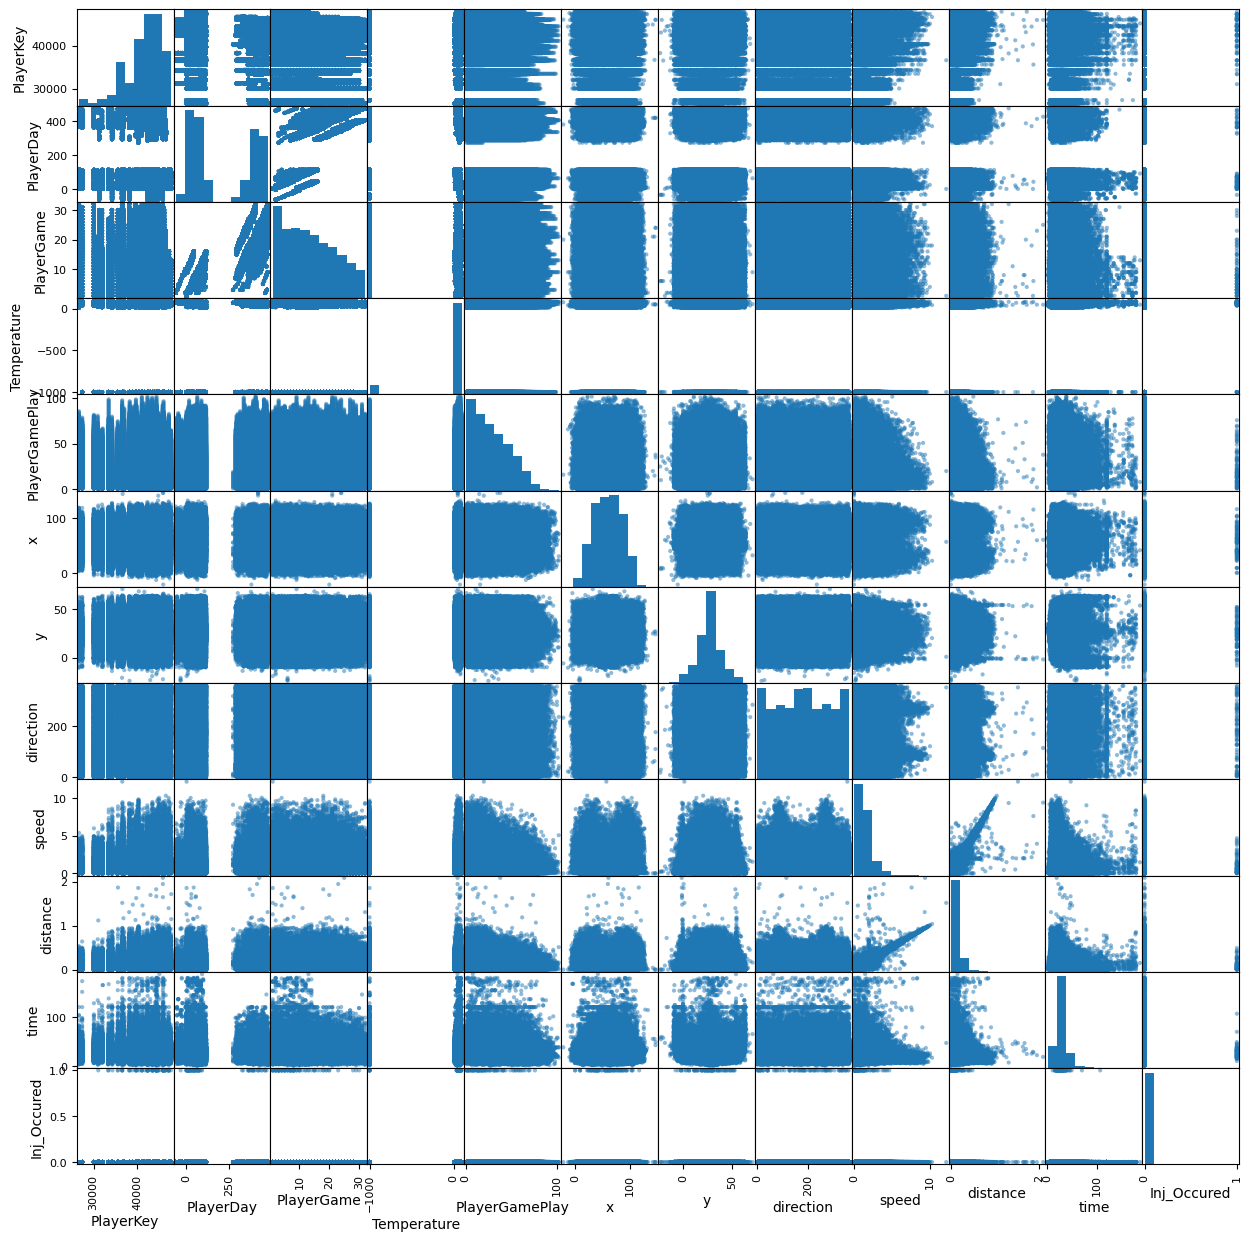

In [ ]:
_ = pd.plotting.scatter_matrix(
    All_Plays_Numeric,
    c=None,
    alpha=0.5,
    figsize=(15, 15),
    diagonal='hist'  
)

plt.show()  

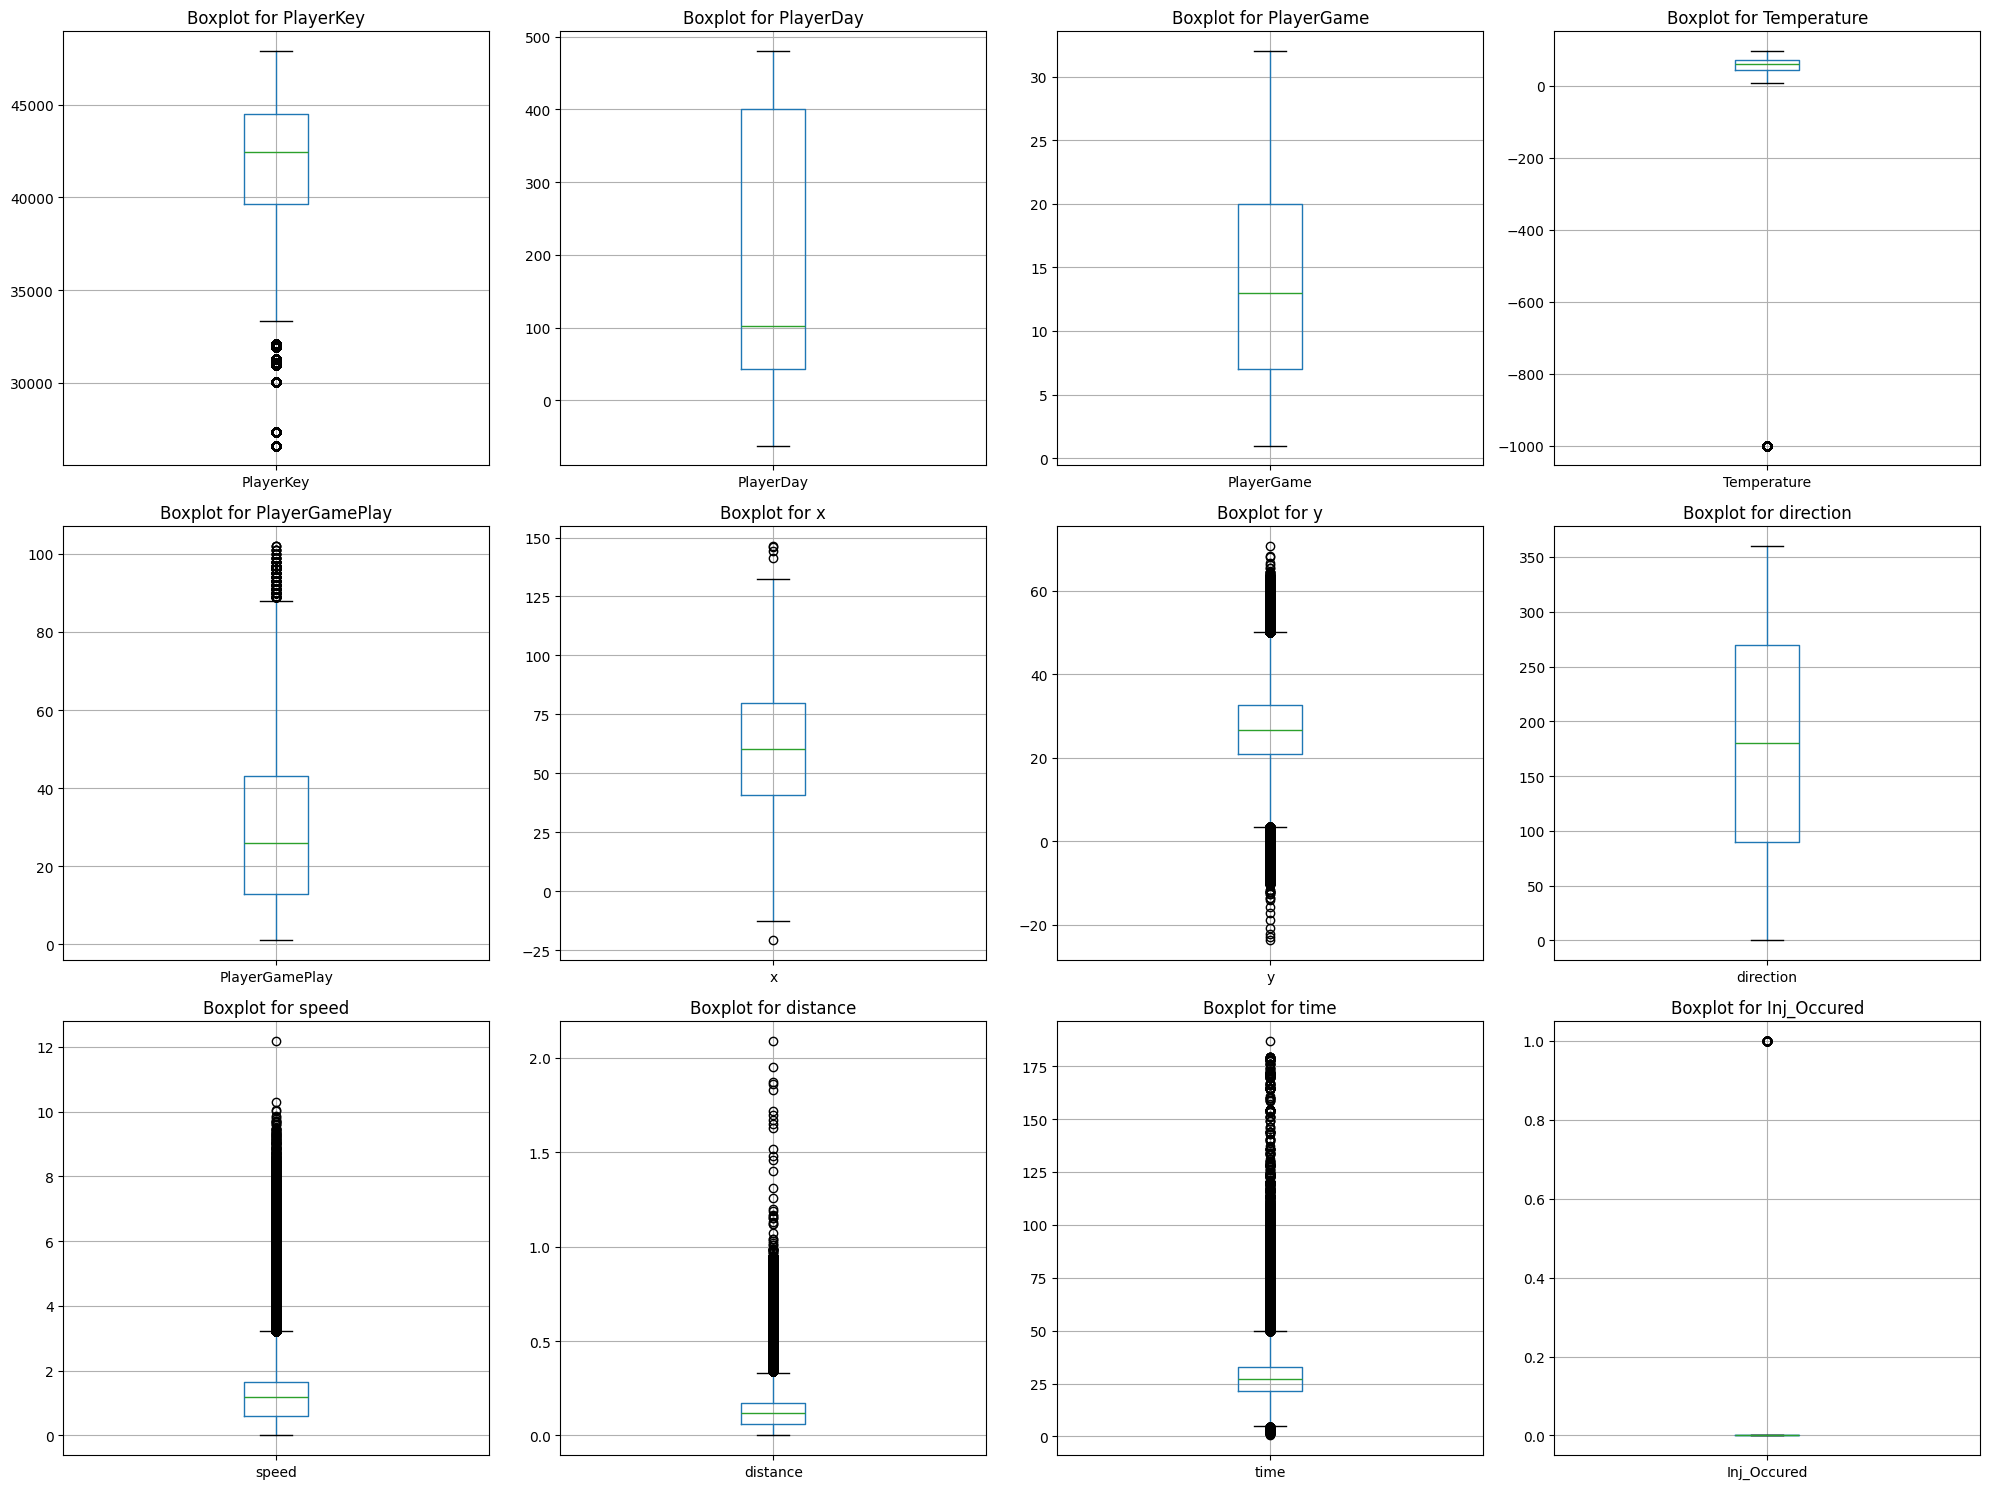

In [ ]:
def boxplots(df):
    num_cols = len(df.columns)  
    rows = 3  
    cols = 4  
    total_plots = min(num_cols, rows * cols)  
    
    fig, axes = plt.subplots(rows, cols, figsize=(20, 15))  
    axes = axes.flatten()  

    for i, col in enumerate(df.columns[:total_plots]):  
        df.boxplot(column=col, ax=axes[i]) 
        axes[i].set_title(f"Boxplot for {col}")  

    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j]) 

    plt.tight_layout()  
    plt.show()

boxplotspredf = All_Plays_Numeric.drop(columns=['PlayKey'], axis=1, errors='ignore')
boxplots(boxplotspredf)

# *Conclusions:*

#### **- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!**

Regarding the Injury Dataset from *1st and Future*: 

When we look at the injury prevalance compared to the plays in those NFL seasons, there is an exceedingly low prevalence of injuries throughout the plays. (Only 77 plays led to Injuries out of over 260,000 ~ So a prevalence of around 00.029 percent.) Because of this, while there are some variables that definitely have *a* correlation to whether an athlete is likely to be injured, traditional techniques are struggling to establish the relative strengths of these correlations. In order to compensate for this, we have a couple of avenues available to us. 
- 1. Curtail our analysis (at least originally) to *only look at players that were injured* 
    - This could let us focus in on what trends in the data were present for all of these occurances. 
- 2. Then, add back in the player data for players that were *not* injured to run any predictive models. 
    - In order to avoid any issues with amplifying the relatively small data group size of the smaller datasets, we should *undersample* the players who did not get injured rather than *oversample* our 77 injuries so that they can hold a candle to the 260,000 player-plays that did not lead to injury. 

#### **- Do you see any outliers?  (Data points that are far from the rest of the data).**

**1st and Future**

Yes, there are a number of columns that have outliers -- particularly when it comes to speed, distance, or positioning on the field. There are also a few outliers that are in the dataset when it comes to temperature as well. The outliers for temperature will definitely need to be taken care of (in this instance, I'll just impute them according to the median temperature.) But the other values are not really concerning to me. A lot of these metrics with outliers have more to do with where plays occured on the field and in the EDA investigating the min() and max() for these fields, neither the minimums or maximums were outside of  the realm  of plausible speeds, field positioning, etc. 

#### **- Are any data items highly correlated with each other, suggesting that they are redundant?**

**1st and Future**: 

- There were some really high correlations between PlayerDay and PlayerGame. We should keep an eye on these columns and make sure to deal with them moving forward before we think about building any models from the data. Additionally, there were correlations between speed, play time (how long a particular play took) and distance which make sense logically. (Plays where there was a significant yardage gain typically took longer to carry out and the players also generally will register greater speeds during these plays (As opposed to getting tackled at the line of scrimmage, etc.))

#### **- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?**

**1st and Future**

This question isn’t entirely applicable to our dataset, as we are not tracking injuries over time. Instead, we are analyzing injuries from a single NFL season to identify trends and factors that may contribute to injury prevalence. When it comes to different types of plays, the only time variable is really the amount of time that a particular play took which doesn't have a correlation to Injury Prevalance which is the main thing that we are interested in. 

#### **- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)**

**1st and Future**

The only confounding variable that I can think of here would possibly be time as it's related to both the distance that a player was able to accumulate during a play and the speed that a player was able to reach during a play. All of these variables had correlation coefficients of 0.00 to the injury occurance target variable so I will likely just drop these columns before any model is made rather than deal with the confounding effects. 

___

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

/var/folders/wg/hrk6rd4s2mv7ztvpxryxn48c0000gn/T/ipykernel_12251/105209393.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


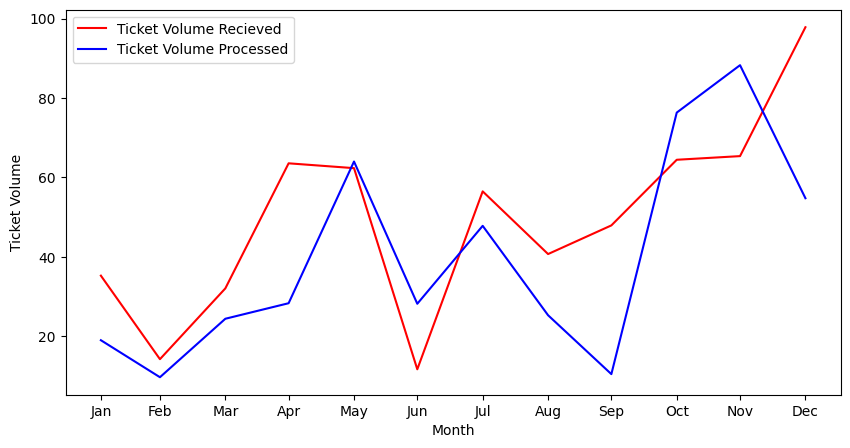

In [ ]:
numdates = 12
np.random.seed(0)
time_series_3 = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
time_series_4 = 100 * np.abs((np.random.normal(size = numdates) / 4 + np.arange(numdates) / 15))

dates = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


plt.figure(figsize=(10, 5))
ax = sns.lineplot(x=dates, y=time_series_3, color='red', label="Ticket Volume Recieved")
ax = sns.lineplot(x=dates, y=time_series_4, color='blue', label="Ticket Volume Processed")

# Format x-axis
ax.set_xticks(dates)  
ax.set_xticklabels(dates.strftime('%b')) 

ax.set_xlabel("Month")
ax.set_ylabel("Ticket Volume")
plt.legend()

plt.show()